#  Code by Aprilia DR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from datetime import datetime as dt

from sklearn.model_selection import train_test_split
from collections import defaultdict

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from warnings import filterwarnings
filterwarnings('ignore')

# Import Dataset

In [2]:
application = pd.read_csv('C:/Users/April/OneDrive/Documents/0 CV APRIL-20210124T125347Z-001/super/Technical Test - Data Scientist/Technical Test - Data Scientist/application_record.csv')
credit_record = pd.read_csv('C:/Users/April/OneDrive/Documents/0 CV APRIL-20210124T125347Z-001/super/Technical Test - Data Scientist/Technical Test - Data Scientist/credit_record.csv')

## understanding dataset application

In [3]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [4]:
application.sample(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
84917,6448858,F,N,N,0,270000.0,Working,Secondary / secondary special,Married,House / apartment,-16821,-2863,1,0,0,0,Sales staff,2.0
252879,6054553,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Separated,House / apartment,-17000,-1062,1,0,1,0,Security staff,1.0
420793,6841684,F,N,N,0,67500.0,Working,Secondary / secondary special,Separated,Municipal apartment,-18443,-2441,1,1,0,0,Core staff,1.0
22929,5067394,F,N,Y,0,157500.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-18258,-628,1,1,1,0,Laborers,1.0
347607,6510263,F,N,Y,1,135000.0,Commercial associate,Secondary / secondary special,Separated,House / apartment,-13925,-5260,1,0,0,0,Drivers,2.0


In [5]:
application.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

dari sampling dataset application, feature FLAG_MOBIL hanya memiliki 1 jenis data, sehingga nanti bisa diabaikan karena tidak memberikan insight 

## understanding dataset credit_record

In [6]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [7]:
credit_record.sample(5)

,ID,MONTHS_BALANCE,STATUS
396701,5046347,-19,0
699421,5095354,-1,C
14398,5002376,-4,X
92777,5005897,-9,X
613834,5079048,-42,0


In [8]:
credit_record.nunique()

ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64

# Preprocessing

## Handling missing value

In [9]:
application.isnull().sum()*100 / application.shape[0]

ID                      0.000000
CODE_GENDER             0.000000
FLAG_OWN_CAR            0.000000
FLAG_OWN_REALTY         0.000000
CNT_CHILDREN            0.000000
AMT_INCOME_TOTAL        0.000000
NAME_INCOME_TYPE        0.000000
NAME_EDUCATION_TYPE     0.000000
NAME_FAMILY_STATUS      0.000000
NAME_HOUSING_TYPE       0.000000
DAYS_BIRTH              0.000000
DAYS_EMPLOYED           0.000000
FLAG_MOBIL              0.000000
FLAG_WORK_PHONE         0.000000
FLAG_PHONE              0.000000
FLAG_EMAIL              0.000000
OCCUPATION_TYPE        30.601039
CNT_FAM_MEMBERS         0.000000
dtype: float64

 30% data di feature OCCUPATION_TYPE hilang, sehingga feature ini akan di drop

In [10]:
application.drop('OCCUPATION_TYPE', axis=1, inplace=True)

In [11]:
credit_record.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

dataset credit_record tidak memiliki missing value

## Handling duplicated data

In [12]:
application.duplicated().value_counts()

False    438557
dtype: int64

In [13]:
credit_record.duplicated().value_counts()

False    1048575
dtype: int64

tidak terdapat data duplicate untuk kedua dataset

## Create Label

In [14]:
credit_record['STATUS'].value_counts()/credit_record.shape[0]*100

C    42.155401
0    36.537205
X    19.953747
1     1.057626
5     0.161457
2     0.082779
3     0.030518
4     0.021267
Name: STATUS, dtype: float64

In [15]:
#melabeli default clients 

default = ['0','1','2','3','4','5']

In [16]:
credit_record['LABEL'] = np.where(credit_record.STATUS.isin(default),1,0)

In [17]:
credit_record.head(3)

,ID,MONTHS_BALANCE,STATUS,LABEL
0,5001711,0,X,0
1,5001711,-1,0,1
2,5001711,-2,0,1


In [18]:
#drop feature STATUS karena sudah tidak diperlukan
credit_record.drop('STATUS', axis=1, inplace=True)

In [19]:
credit_record.head(3)

,ID,MONTHS_BALANCE,LABEL
0,5001711,0,0
1,5001711,-1,1
2,5001711,-2,1


In [20]:
credit_record['LABEL'].value_counts()

0    651261
1    397314
Name: LABEL, dtype: int64

<AxesSubplot:xlabel='LABEL', ylabel='count'>

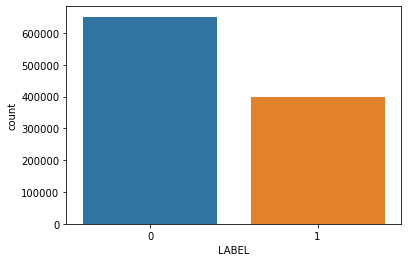

In [21]:
#plotting label

sns.countplot(x = 'LABEL', data = credit_record)

Label '0' merepresentasikan good loan, sedangkan '1' merepresentasikan bad loan

## Merge two datasets

In [22]:
merged = pd.merge(credit_record, application, on='ID', how='left')
merged.head()

,ID,MONTHS_BALANCE,LABEL,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5001711,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5001711,-1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5001711,-2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5001711,-3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5001712,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ID                   1048575 non-null  int64  
 1   MONTHS_BALANCE       1048575 non-null  int64  
 2   LABEL                1048575 non-null  int32  
 3   CODE_GENDER          777715 non-null   object 
 4   FLAG_OWN_CAR         777715 non-null   object 
 5   FLAG_OWN_REALTY      777715 non-null   object 
 6   CNT_CHILDREN         777715 non-null   float64
 7   AMT_INCOME_TOTAL     777715 non-null   float64
 8   NAME_INCOME_TYPE     777715 non-null   object 
 9   NAME_EDUCATION_TYPE  777715 non-null   object 
 10  NAME_FAMILY_STATUS   777715 non-null   object 
 11  NAME_HOUSING_TYPE    777715 non-null   object 
 12  DAYS_BIRTH           777715 non-null   float64
 13  DAYS_EMPLOYED        777715 non-null   float64
 14  FLAG_MOBIL           777715 non-null   float64
 15

In [24]:
merged.isnull().sum() * 100 /merged.shape[0]

ID                      0.000000
MONTHS_BALANCE          0.000000
LABEL                   0.000000
CODE_GENDER            25.831247
FLAG_OWN_CAR           25.831247
FLAG_OWN_REALTY        25.831247
CNT_CHILDREN           25.831247
AMT_INCOME_TOTAL       25.831247
NAME_INCOME_TYPE       25.831247
NAME_EDUCATION_TYPE    25.831247
NAME_FAMILY_STATUS     25.831247
NAME_HOUSING_TYPE      25.831247
DAYS_BIRTH             25.831247
DAYS_EMPLOYED          25.831247
FLAG_MOBIL             25.831247
FLAG_WORK_PHONE        25.831247
FLAG_PHONE             25.831247
FLAG_EMAIL             25.831247
CNT_FAM_MEMBERS        25.831247
dtype: float64

terdapat sekitar 26% missing value di beberapa feature, sehingga nanti akan di drop

In [25]:
merged.dropna(inplace = True)

In [26]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 92938 to 1048574
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   MONTHS_BALANCE       777715 non-null  int64  
 2   LABEL                777715 non-null  int32  
 3   CODE_GENDER          777715 non-null  object 
 4   FLAG_OWN_CAR         777715 non-null  object 
 5   FLAG_OWN_REALTY      777715 non-null  object 
 6   CNT_CHILDREN         777715 non-null  float64
 7   AMT_INCOME_TOTAL     777715 non-null  float64
 8   NAME_INCOME_TYPE     777715 non-null  object 
 9   NAME_EDUCATION_TYPE  777715 non-null  object 
 10  NAME_FAMILY_STATUS   777715 non-null  object 
 11  NAME_HOUSING_TYPE    777715 non-null  object 
 12  DAYS_BIRTH           777715 non-null  float64
 13  DAYS_EMPLOYED        777715 non-null  float64
 14  FLAG_MOBIL           777715 non-null  float64
 15  FLAG_WORK_PH

# EDA

Text(0, 0.5, 'Number of Defaulters')

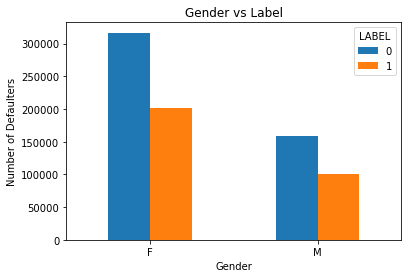

In [27]:
# gender vs label
pd.crosstab(merged.CODE_GENDER,merged.LABEL).plot(kind='bar')
plt.title('Gender vs Label')
plt.xlabel('Gender')
plt.xticks(rotation = 360)
plt.ylabel('Number of Defaulters')

Insight :
1. Secara overall, jumlah good loan lebih banyak pada kedua gender
2. Bad loan di dominasi oleh wanita

Text(0, 0.5, 'Number of Defaulters')

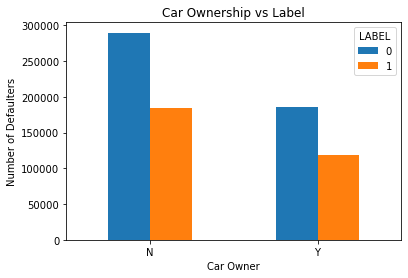

In [28]:
# car owership vs label
pd.crosstab(merged.FLAG_OWN_CAR,merged.LABEL).plot(kind='bar')
plt.title('Car Ownership vs Label')
plt.xlabel('Car Owner')
plt.xticks(rotation = 360)
plt.ylabel('Number of Defaulters')

INSIGHT:
1. Secara overall, jumlah good load lebih banyak pada kedua kondisi
2. Bad loan di dominasi oleh client yang tidak memiliki mobil

Text(0, 0.5, 'Number of Defaulters')

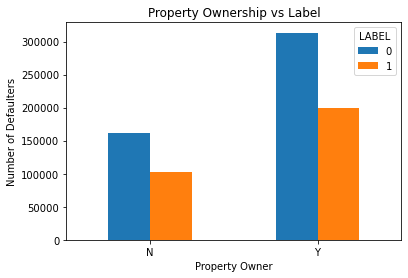

In [29]:
# Property Ownership vs Label
pd.crosstab(merged.FLAG_OWN_REALTY,merged.LABEL).plot(kind='bar')
plt.title('Property Ownership vs Label')
plt.xlabel('Property Owner')
plt.xticks(rotation = 360)
plt.ylabel('Number of Defaulters')

Insight:
1. Secara overall, jumlah good loan lebih banyak daripada Bad Loan
2. Bad Loan di dominasi oleh client yang memiliki property

Text(0, 0.5, 'Number of Defaulters')

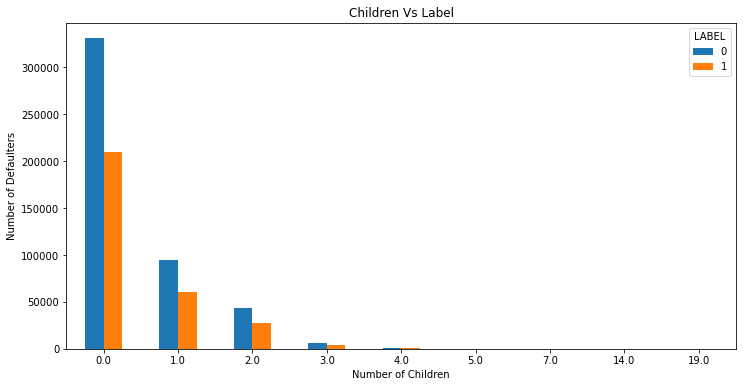

In [30]:
#Children vs Label
pd.crosstab(merged.CNT_CHILDREN, merged.LABEL).plot(kind='bar', figsize=(12,6))
plt.title('Children Vs Label')
plt.xlabel('Number of Children')
plt.xticks(rotation = 360)
plt.ylabel('Number of Defaulters')

Insight:

1. Secara overall, jumlah good loan lebih banyak daripada Bad Loan
2. Bad Loan di dominasi oleh client yang tidak memiliki anak

Text(0.5, 0, 'Number of Defaulters')

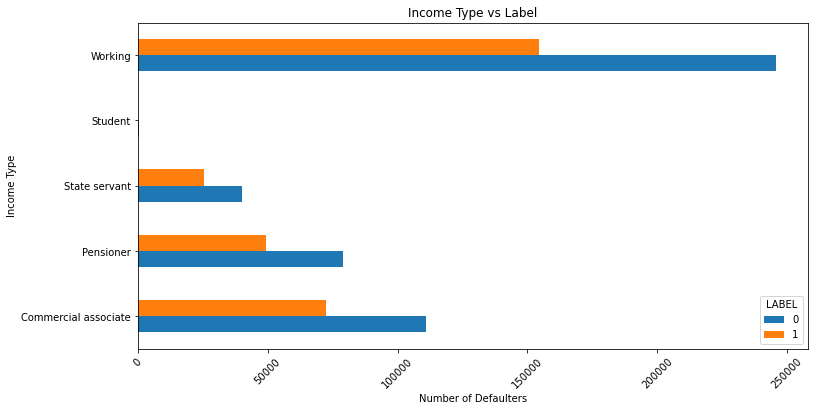

In [31]:
# Income Type vs Label
pd.crosstab(merged.NAME_INCOME_TYPE, merged.LABEL).plot(kind='barh', figsize=(12,6))
plt.title('Income Type vs Label')
plt.ylabel('Income Type')
plt.xticks(rotation = 45)
plt.xlabel('Number of Defaulters')

Insight:

1. Secara overall, jumlah good loan lebih banyak daripada Bad Loan
2. Bad Loan di dominasi oleh client yang ber profesi sebagai commercial associate
3. Student yang paling jarang mengajukan loan

Text(0, 0.5, 'Number of Defaulters')

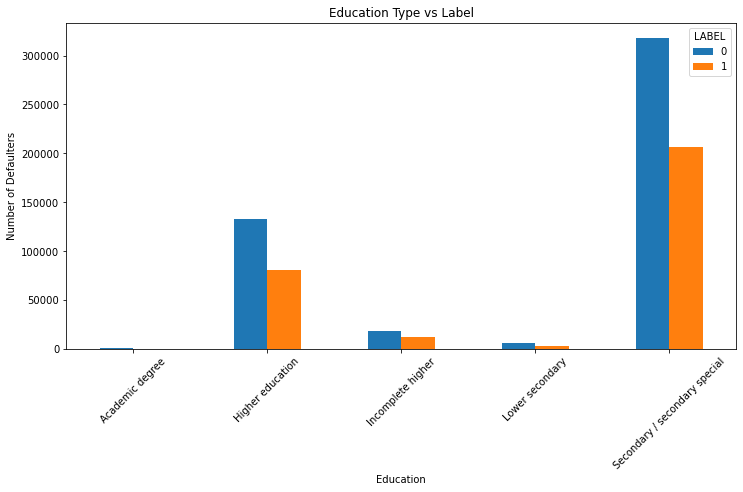

In [32]:
# Education vs Label
pd.crosstab(merged.NAME_EDUCATION_TYPE, merged.LABEL).plot(kind='bar', figsize=(12,6))
plt.title('Education Type vs Label')
plt.xlabel('Education')
plt.xticks(rotation = 45)
plt.ylabel('Number of Defaulters')

Insight:

1. Secara overall, jumlah good loan lebih banyak daripada Bad Loan
2. Bad Loan di dominasi oleh client yang memiliki pendidikan secondary/secondary special
3. Client dengan pendidikan academic degree yang paling jarang mengajukan loan

Text(0, 0.5, 'Number of Defaulters')

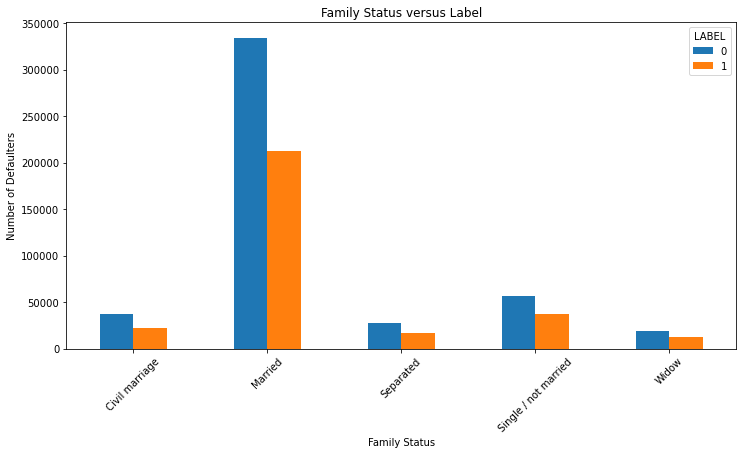

In [33]:
# Family status vs label
pd.crosstab(merged.NAME_FAMILY_STATUS, merged.LABEL).plot(kind='bar', figsize=(12,6))
plt.title('Family Status versus Label')
plt.xlabel('Family Status')
plt.xticks(rotation = 45)
plt.ylabel('Number of Defaulters')

Insight:

1. Secara overall, jumlah good loan lebih banyak daripada Bad Loan
2. Bad Loan di dominasi oleh client dengan status married
3. Client dengan status widow paling jarang mengajukan loan

Text(0, 0.5, 'Number of Defaulters')

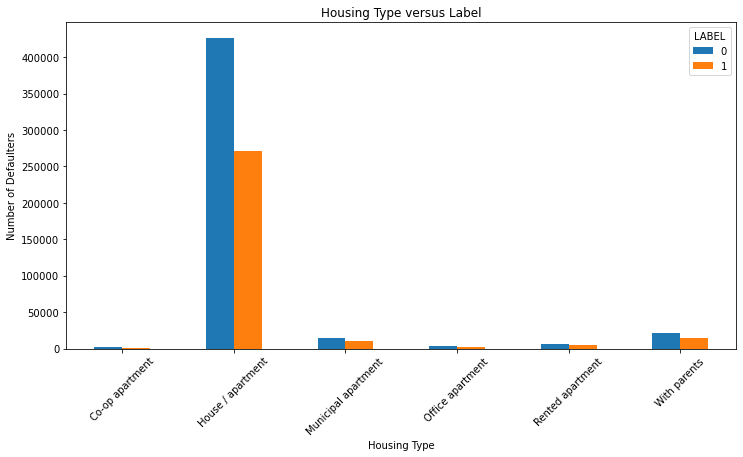

In [34]:
# Housing Type vs Label
pd.crosstab(merged.NAME_HOUSING_TYPE, merged.LABEL).plot(kind='bar', figsize=(12,6))
plt.title('Housing Type versus Label')
plt.xlabel('Housing Type')
plt.xticks(rotation = 45)
plt.ylabel('Number of Defaulters')

Insight:

1. Secara overall, jumlah good loan lebih banyak daripada Bad Loan
2. Bad Loan di dominasi oleh client yang memiliki house/apartment
3. Client co-op apartment paling jarang mengajukan loan

Text(0, 0.5, 'Number of Defaulters')

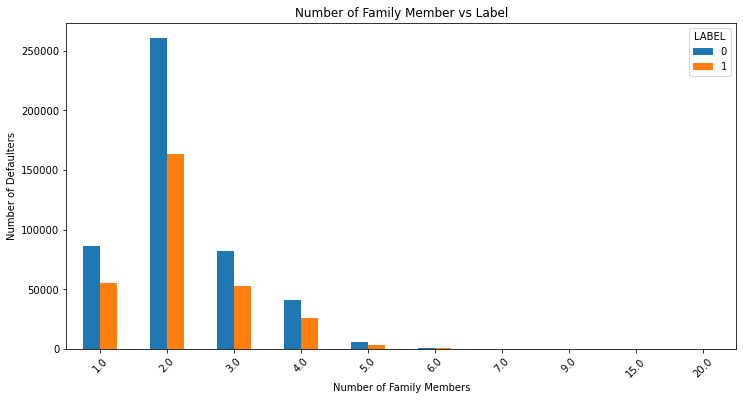

In [35]:
# Number of Family member vs Label
pd.crosstab(merged.CNT_FAM_MEMBERS,merged.LABEL).plot(kind='bar', figsize=(12,6))

plt.title('Number of Family Member vs Label')
plt.xlabel('Number of Family Members')
plt.xticks(rotation = 45)
plt.ylabel('Number of Defaulters')

In [36]:
pd.crosstab(merged.CNT_FAM_MEMBERS, merged.LABEL)

LABEL,0,1
CNT_FAM_MEMBERS,,
1.0,85874,55603
2.0,260269,163454
3.0,81900,52994
4.0,40843,26147
5.0,5626,3373
6.0,712,484
7.0,216,57
9.0,22,24
15.0,24,87


Insight:

1. Secara overall, jumlah good loan lebih banyak daripada Bad Loan
2. Bad Loan di dominasi oleh client yang family member berjumlah 2

# Feature Engineering

## Convert Days Birth to Age

In [37]:
# mengkonversi DAYS_BIRTH menjadi AGE agar lebih mudah dipahami
merged['AGE'] = np.ceil(pd.to_timedelta(merged['DAYS_BIRTH'], unit='D').dt.days / -365.25)

In [38]:
merged['AGE']

92938      33.0
92939      33.0
92940      33.0
92941      33.0
92942      33.0
           ... 
1048570    54.0
1048571    54.0
1048572    54.0
1048573    54.0
1048574    54.0
Name: AGE, Length: 777715, dtype: float64

In [39]:
merged.drop('DAYS_BIRTH', axis = 1, inplace = True)

## Convert Days Employed to Years Employed

In [40]:
# mengkonversi DAYS_EMPLOYED menjadi YEARS_EMPLOYED agar lebih mudah dipahami
merged.loc[(merged['DAYS_EMPLOYED'] > 0), 'DAYS_EMPLOYED'] = 0
merged['YEARS_EMPLOYED'] = np.ceil(pd.to_timedelta(merged['DAYS_EMPLOYED'], unit='D').dt.days / -365.25)

In [41]:
merged['YEARS_EMPLOYED']

92938      13.0
92939      13.0
92940      13.0
92941      13.0
92942      13.0
           ... 
1048570     6.0
1048571     6.0
1048572     6.0
1048573     6.0
1048574     6.0
Name: YEARS_EMPLOYED, Length: 777715, dtype: float64

In [42]:
merged.drop(['DAYS_EMPLOYED', 'MONTHS_BALANCE', 'FLAG_MOBIL'], axis = 1, inplace = True)

## Final Column

In [43]:
merged.columns

Index(['ID', 'LABEL', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'AGE',
       'YEARS_EMPLOYED'],
      dtype='object')

In [44]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 92938 to 1048574
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   LABEL                777715 non-null  int32  
 2   CODE_GENDER          777715 non-null  object 
 3   FLAG_OWN_CAR         777715 non-null  object 
 4   FLAG_OWN_REALTY      777715 non-null  object 
 5   CNT_CHILDREN         777715 non-null  float64
 6   AMT_INCOME_TOTAL     777715 non-null  float64
 7   NAME_INCOME_TYPE     777715 non-null  object 
 8   NAME_EDUCATION_TYPE  777715 non-null  object 
 9   NAME_FAMILY_STATUS   777715 non-null  object 
 10  NAME_HOUSING_TYPE    777715 non-null  object 
 11  FLAG_WORK_PHONE      777715 non-null  float64
 12  FLAG_PHONE           777715 non-null  float64
 13  FLAG_EMAIL           777715 non-null  float64
 14  CNT_FAM_MEMBERS      777715 non-null  float64
 15  AGE         

## Feature Encoding for categorical data

In [45]:
merged2 = merged.copy()

In [46]:
#Only run this code 1 time
cats = [col for col in merged2.select_dtypes(include='object').columns.tolist()]
onehot = pd.get_dummies(merged2[cats], drop_first=True)

In [47]:
onehot.head()

,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
92938,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
92939,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
92940,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
92941,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
92942,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0


In [48]:
# Removing original columns
merged2.drop(['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE'], axis=1, inplace=True)

In [49]:
# Joining the DataFrames
merged2 = merged2.join(onehot)

In [50]:
merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 92938 to 1048574
Data columns (total 30 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   ID                                                 777715 non-null  int64  
 1   LABEL                                              777715 non-null  int32  
 2   CNT_CHILDREN                                       777715 non-null  float64
 3   AMT_INCOME_TOTAL                                   777715 non-null  float64
 4   FLAG_WORK_PHONE                                    777715 non-null  float64
 5   FLAG_PHONE                                         777715 non-null  float64
 6   FLAG_EMAIL                                         777715 non-null  float64
 7   CNT_FAM_MEMBERS                                    777715 non-null  float64
 8   AGE                                                777715 non-null  f

## Feature standardization for numerical data

In [51]:
from sklearn.preprocessing import StandardScaler
merged2[['CNT_CHILDREN','AMT_INCOME_TOTAL','AGE','YEARS_EMPLOYED','CNT_FAM_MEMBERS']] = pd.DataFrame(StandardScaler().fit_transform(merged2[['CNT_CHILDREN','AMT_INCOME_TOTAL','AGE','YEARS_EMPLOYED','CNT_FAM_MEMBERS']]), index=merged2.index, columns=['CNT_CHILDREN','AMT_INCOME_TOTAL','AGE','YEARS_EMPLOYED','CNT_FAM_MEMBERS'])                                                                                       

In [52]:
merged2

,ID,LABEL,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,...,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
92938,5008804,0,-0.574026,2.351502,1.0,0.0,0.0,-0.230155,-1.035585,0.918067,...,0,0,0,0,0,0,0,0,1,0
92939,5008804,0,-0.574026,2.351502,1.0,0.0,0.0,-0.230155,-1.035585,0.918067,...,0,0,0,0,0,0,0,0,1,0
92940,5008804,0,-0.574026,2.351502,1.0,0.0,0.0,-0.230155,-1.035585,0.918067,...,0,0,0,0,0,0,0,0,1,0
92941,5008804,0,-0.574026,2.351502,1.0,0.0,0.0,-0.230155,-1.035585,0.918067,...,0,0,0,0,0,0,0,0,1,0
92942,5008804,0,-0.574026,2.351502,1.0,0.0,0.0,-0.230155,-1.035585,0.918067,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,5150487,0,-0.574026,0.137422,0.0,0.0,0.0,-0.230155,0.832580,-0.115991,...,1,1,0,0,0,1,0,0,0,0
1048571,5150487,0,-0.574026,0.137422,0.0,0.0,0.0,-0.230155,0.832580,-0.115991,...,1,1,0,0,0,1,0,0,0,0
1048572,5150487,0,-0.574026,0.137422,0.0,0.0,0.0,-0.230155,0.832580,-0.115991,...,1,1,0,0,0,1,0,0,0,0
1048573,5150487,0,-0.574026,0.137422,0.0,0.0,0.0,-0.230155,0.832580,-0.115991,...,1,1,0,0,0,1,0,0,0,0


# Modelling

In [53]:
merged3 = merged2.copy()

In [54]:
credit_approval = merged3.drop('ID', axis = 1, inplace = False)

In [55]:
credit_approval

,LABEL,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,CODE_GENDER_M,...,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
92938,0,-0.574026,2.351502,1.0,0.0,0.0,-0.230155,-1.035585,0.918067,1,...,0,0,0,0,0,0,0,0,1,0
92939,0,-0.574026,2.351502,1.0,0.0,0.0,-0.230155,-1.035585,0.918067,1,...,0,0,0,0,0,0,0,0,1,0
92940,0,-0.574026,2.351502,1.0,0.0,0.0,-0.230155,-1.035585,0.918067,1,...,0,0,0,0,0,0,0,0,1,0
92941,0,-0.574026,2.351502,1.0,0.0,0.0,-0.230155,-1.035585,0.918067,1,...,0,0,0,0,0,0,0,0,1,0
92942,0,-0.574026,2.351502,1.0,0.0,0.0,-0.230155,-1.035585,0.918067,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0,-0.574026,0.137422,0.0,0.0,0.0,-0.230155,0.832580,-0.115991,1,...,1,1,0,0,0,1,0,0,0,0
1048571,0,-0.574026,0.137422,0.0,0.0,0.0,-0.230155,0.832580,-0.115991,1,...,1,1,0,0,0,1,0,0,0,0
1048572,0,-0.574026,0.137422,0.0,0.0,0.0,-0.230155,0.832580,-0.115991,1,...,1,1,0,0,0,1,0,0,0,0
1048573,0,-0.574026,0.137422,0.0,0.0,0.0,-0.230155,0.832580,-0.115991,1,...,1,1,0,0,0,1,0,0,0,0


## Create Function

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.3f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.3f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.3f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.3f" % precision_score(y_train, y_pred_train))
    print("Recall (Test Set): %.3f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.3f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.3f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.3f" % f1_score(y_train, y_pred_train))
    print("ROC_AUC (test-proba): %.3f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("ROC_AUC (train-proba): %.3f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

## Train Test Split

In [57]:
X = credit_approval.drop('LABEL', axis=1)
y = credit_approval['LABEL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)

In [58]:
X_train.shape, X_test.shape

((583286, 28), (194429, 28))

## Evaluation Matrix

In [59]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

eval_classification(dt, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.713
Accuracy (Train Set): 0.722
Precision (Test Set): 0.689
Precision (Train Set): 0.704
Recall (Test Set): 0.479
Recall (Train Set): 0.492
F1-Score (Test Set): 0.565
F1-Score (Train Set): 0.579
ROC_AUC (test-proba): 0.763
ROC_AUC (train-proba): 0.777


In [60]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

eval_classification(rfc, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.713
Accuracy (Train Set): 0.722
Precision (Test Set): 0.687
Precision (Train Set): 0.702
Recall (Test Set): 0.482
Recall (Train Set): 0.495
F1-Score (Test Set): 0.567
F1-Score (Train Set): 0.581
ROC_AUC (test-proba): 0.763
ROC_AUC (train-proba): 0.777


## SMOTE FEATURE LABEL

In [61]:
#coba smote
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print('Original dataset shape', y_train.value_counts())
print('Resample dataset shape', y_smote.value_counts())

Original dataset shape 0    356679
1    226607
Name: LABEL, dtype: int64
Resample dataset shape 0    356679
1    356679
Name: LABEL, dtype: int64


In [62]:
dt_smote = DecisionTreeClassifier()
dt_smote.fit(X_smote, y_smote)

eval_classification(dt, X_smote, y_smote, X_test, y_test)

Accuracy (Test Set): 0.713
Accuracy (Train Set): 0.680
Precision (Test Set): 0.689
Precision (Train Set): 0.789
Recall (Test Set): 0.479
Recall (Train Set): 0.491
F1-Score (Test Set): 0.565
F1-Score (Train Set): 0.605
ROC_AUC (test-proba): 0.763
ROC_AUC (train-proba): 0.777


In [63]:
rf_smote = RandomForestClassifier()
rf_smote.fit(X_smote, y_smote)

eval_classification(dt, X_smote, y_smote, X_test, y_test)

Accuracy (Test Set): 0.713
Accuracy (Train Set): 0.680
Precision (Test Set): 0.689
Precision (Train Set): 0.789
Recall (Test Set): 0.479
Recall (Train Set): 0.491
F1-Score (Test Set): 0.565
F1-Score (Train Set): 0.605
ROC_AUC (test-proba): 0.763
ROC_AUC (train-proba): 0.777


**Berdasarkan matrix evaluasi kedua kondisi (tanpa SMOTE dan menggunakan SMOTE) hasil yang didapat tidak memiliki perbedaan signifikan**

## Visualize AUC and KS

Untuk mengukur performa model, dua metrik yang umum dipakai dalam dunia credit risk adalah AUC dan KS. 

In [64]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

In [65]:
from sklearn.metrics import roc_curve, roc_auc_score

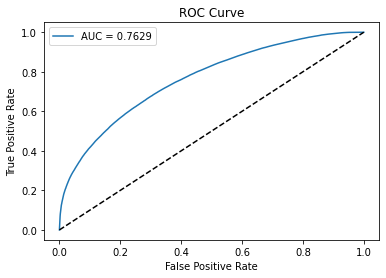

In [66]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

## KS

In [67]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.3762')

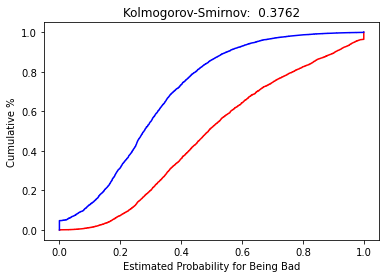

In [68]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

Model yang dibangun menghasilkan performa AUC = 0.857 dan KS = 0.56. Pada dunia credit risk modeling, umumnya AUC di atas 0.7 dan KS di atas 0.3 sudah termasuk performa yang baik.

# Feature Importance

In [69]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

#Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
    plt.figure(figsize=(10,15))
#Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
    plt.title(model_type + ' ' + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

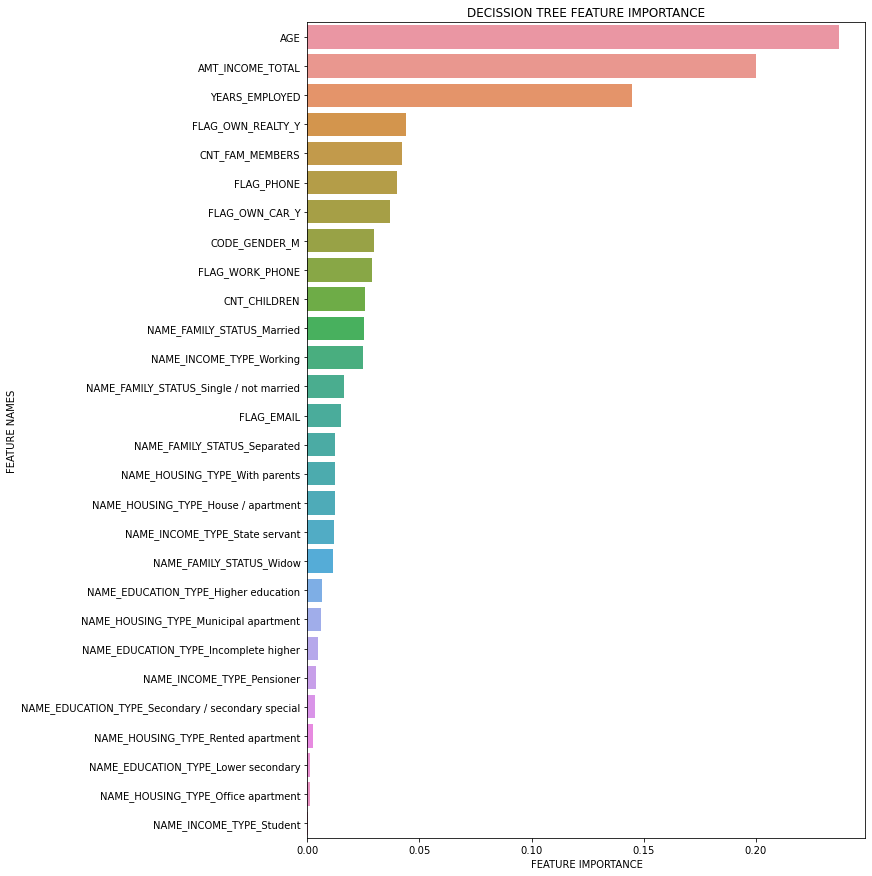

In [70]:
plot_feature_importance(dt.feature_importances_,X_train.columns,'DECISSION TREE')

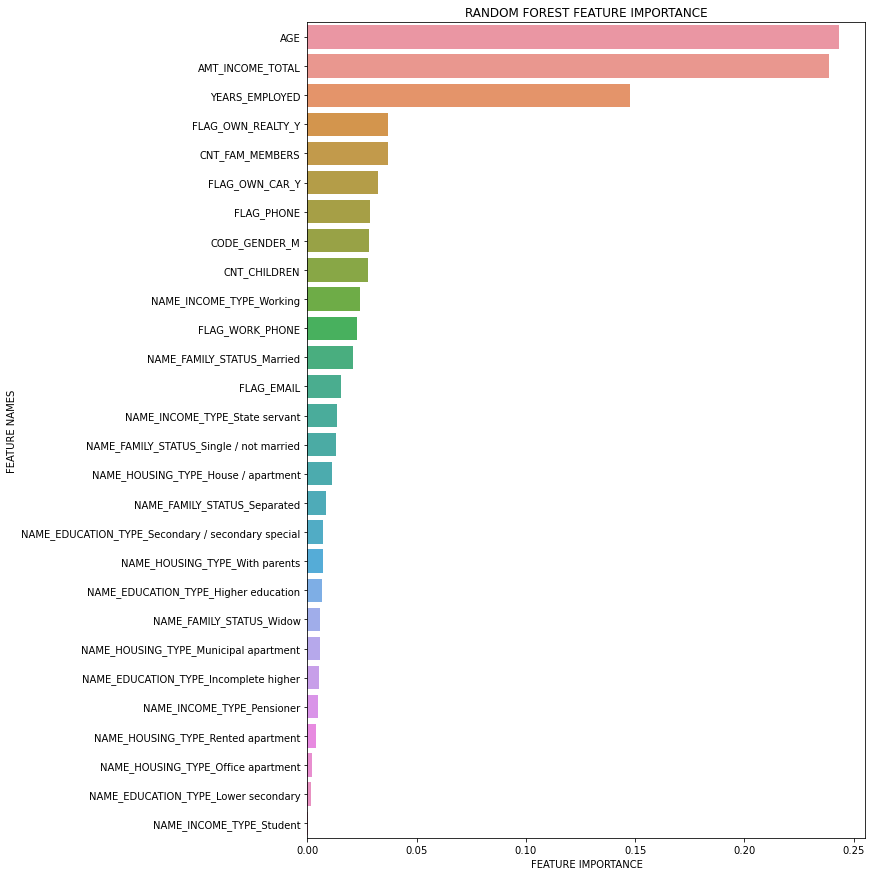

In [71]:
plot_feature_importance(rfc.feature_importances_,X_train.columns,'RANDOM FOREST')

Dengan menggunakan model decission tree dan random forest classifier, kita mampu melihat feature yang paling penting dalam membangun model.

Dalam algoritma decission tree dan random forest classifier, dapat kita lihat bahwa age merupakan feature yang sangat penting dalam menentukan apakah credit score baik atau tidak. Feature penting lain adalah total amount income dan years employment

Kesimpulan
1. Model yang dibangun menghasilkan performa AUC = 0.857 dan KS = 0.56. Pada dunia credit risk modeling, umumnya AUC di atas 0.7 dan KS di atas 0.3 sudah termasuk performa yang baik.

SARAN

Melakukan hyperparameter tuning agar mendapatkan hasil yang lebih baik